# Tutorial - Machine Learning para Economistas

## Tutorial 7

**Objetivo:** 
Que se familiaricen con los ensambles en la teoría y en la práctica con scikitlearn

### Temario:
- Ensemble Learning
- Bagging
- Random Forest
- Boosting 


### Motivación
Vimos el método de Árboles para clasificación o regresión, que se basaba en partir el espacio de atributos en 'rectángulos' o regiones.

Si bien este método tenía algunas ventajas como que es fácil de ilustrar y explicar, suele tener menos capacidad predictiva que otros métodos y suele ser poco robusto.

Entonces...

### ¿Qué son los métodos de Ensamble?
Son métodos que tienen como objetivo mejorar el rendimiento predictivo de un modelo dado. El principio general de los métodos de ensamble es construir una combinación lineal de algún método de ajuste del modelo, en lugar de utilizar un único ajuste del método. Por ejemplo, hay Ensambles que combinan varios árboles de decisión para producir una mejor predicción que un clasificador de árbol de decisión único. El ensemble ayuda a reducir la varianza y/o el sesgo.

### [Ensambles](https://scikit-learn.org/stable/modules/ensemble.html) 
El objetivo de los algoritmos de Ensemble es combinar las predicciones de varios estimadores base construidos con un algoritmo de aprendizaje dado para mejorar la generalización / robustez sobre un solo estimador.

#### Hay dos familias de métodos de ensamble que generalmente se distinguen:

**Métodos de promedio:** el principio impulsor es construir varios estimadores de forma independiente y luego promediar sus predicciones. En promedio, el estimador combinado suele ser mejor que cualquiera de los estimadores de base única porque su varianza es menor y ayuda a evitar el sobreajuste. **Ejemplos:** *Bootstrap Aggregation (Bagging)*, *Random Forest*.

**Métodos de Boosting:** los estimadores base se construyen secuencialmente y se intenta reducir el sesgo del estimador combinado. Esto puede causar sobreajuste. Para evitarlo, el ajuste de parámetros juega un papel importante en la mejora de estos algoritmos. La motivación es combinar varios modelos débiles para producir un modelo más robusto. 
**Ejemplos:** *AdaBoost*, *Gradient Tree Boosting*, *GBM*, *XGBM*.

#### Ventajas del ensamble
- Los ensambles mejoran la precisión del modelo y funcionan en la mayoría de los casos.
- Los ensambles hacen que el modelo sea más robusto y estable, lo que garantiza un rendimiento decente en los casos de prueba en la mayoría de los escenarios.
- Los ensambles se pueden utilizar para capturar relaciones lineales, simples y complejas, así como no lineales en los datos. Esto se puede hacer usando dos modelos diferentes y formando un ensamble con ellos.

#### Desventajas del ensamble
- Los ensambles reducen la interpretabilidad del modelo y hacen que sea difícil comunicar los resultados.
- Llevan más tiempo y, por lo tanto, podría no ser la mejor idea para aplicaciones en tiempo real.
- La selección de modelos para crear un ensamble es un arte realmente difícil de dominar.

#### Técnicas básicas de ensambles
- *Majority Vote*: es una de las formas más simples de combinar predicciones de múltiples algoritmos de aprendizaje automático. Cada modelo base hace una predicción y vota para cada muestra. Para cada una de las observaciones, la clase con más votos se considera la clase predictiva final. Se utiliza principalmente para problemas de clasificación.
- *Promedio*: el promedio generalmente se usa para problemas de regresión (pero se puede utilizar al estimar las probabilidades en las tareas de clasificación). Las predicciones se extraen de varios modelos y se utiliza un promedio de las predicciones para hacer la predicción final.
- *Promedio ponderado*: al igual que el promedio, el promedio ponderado también se usa para tareas de regresión. Alternativamente, se puede utilizar al estimar probabilidades en problemas de clasificación. A los modelos de base se les asignan diferentes ponderaciones, que representan la importancia de cada modelo en la predicción.


### Muestreo Bootstrap

En Machine Learning, el método *bootstrap* se refiere al muestreo aleatorio con reemplazo. Esta muestra se denomina remuestreo. Esto permite que el modelo o algoritmo obtenga una mejor comprensión de los diversos sesgos, variaciones y características que existen en la muestra. Tomar una muestra de los datos permite que la nueva muestra contenga características diferentes de las que podría haber contenido en su totalidad. 

Supongamos que tenemos una muestra de "n" valores (x) y nos gustaría obtener una estimación de la media de la muestra. Para hacerlo con *Bootstrapping* el procedimiento sería:

1. Crear muchas submuestras aleatorias (por ejemplo, 1000) del conjunto de datos con reemplazo (lo que significa que podemos seleccionar el mismo valor varias veces).
2. Calcular la media de cada submuestra. 
3. Calcular el promedio de todas nuestras medias recopiladas y utilizarlo como nuestra media estimada para los datos.

**Notar:** Este proceso se puede utilizar para estimar otras cantidades como la desviación estándar e incluso las cantidades utilizadas en los algoritmos de aprendizaje automático, como los coeficientes aprendidos.

**Ejemplo:**

In [62]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from ISLP import load_data
%matplotlib inline

from sklearn import metrics 
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor 

In [64]:
dataset = load_data('Boston')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [66]:
dataset = load_data('Boston')
y = dataset['medv']
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


In [68]:
print("Para el total de la muestra la media es: ", round(y.mean(), 2), "\ny la desviación estandar es: ", round(np.std(y), 2))
all_means = []
all_std = []

for sample in range(0,500): 
    boot = resample(y, replace = True, n_samples = 100) #la y tiene 506 obs. Hacemos muestras de 100
    mean = boot.mean()
    std = np.std(boot)
    all_means.append(mean)
    all_std.append(std)
print("\nPara las submuestras la media es: ", round(np.mean(all_means), 2), "\ny la desviación estandar es: ", round(np.std(all_std), 2))

Para el total de la muestra la media es:  22.53 
y la desviación estandar es:  9.19

Para las submuestras la media es:  22.57 
y la desviación estandar es:  0.86


Alcanzamos una media muy similar pero una desviación estándar mucho menor.
Esta idea de Boostrap la vamos a usar en el ejemplo a continuación para predecir los precios de las viviendas.


### Ejercicio práctico con la base de Boston Housing 

**Variables in database:**
- CRIM:     per capita crime rate by town
- ZN:    proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:   proportion of non-retail business acres per town
- CHAS:  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE:      proportion of owner-occupied units built prior to 1940
- DIS:      weighted distances to five Boston employment centres
- RAD:      index of accessibility to radial highways
- TAX:      full-value property-tax rate per USD10,000
- PTRATIO:  pupil-teacher ratio by town
- LSTAT:    % lower status of the population
- MEDV:     Median value of owner-occupied homes in USD1000's

In [70]:
# Primero importamos las bibliotecas necesarias y nuestro conjunto de datos.
dataset = load_data('Boston')
print(dataset.shape)
dataset.head() 

(506, 13)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


#### Preparación de datos para entrenamiento

En primer lugar, dividiremos los datos en conjuntos de "atributos" (X) y "etiquetas" (y). El resultado luego se dividirá en conjuntos de entrenamiento y prueba.

En segundo lugar, notarán que los valores de la base de datos no están muy bien escalados. El campo TAX tiene valores en el rango de las centenas, mientras que RAD por ejemplo tiene valores en el rango de unidades. Será mejor si escalamos los datos. Usaremos la clase StandardScaler de Scikit-Learn para hacerlo.

In [72]:
X = dataset.iloc[:, 0:12]
y = dataset.iloc[:, 12].values
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [76]:
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

### CART
Para utilizar Arboles de regresión y clasificación con Scikit-Learn tenemos [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) y [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier). En este caso usaremos DecisionTreeRegressor dado que queremos predecir el valor de las viviendas.

In [78]:
cv = KFold(n_splits=10, shuffle = True, random_state = 10)            
mses = list()
max_attributes = X_train.shape[1]
depth_range = range(1, max_attributes + 1)

for depth in depth_range:
    fold_mse = []
    tree_model = DecisionTreeRegressor(max_depth = depth) # Para predecir los precios 
    
    for train_index, valida_index in cv.split(X_train):   
        x_train, x_valida = X_train[train_index], X_train[valida_index] 
        y_train, y_valida = Y_train[train_index], Y_train[valida_index] 
    
        model = tree_model.fit(x_train, y_train) 
        y_pred = model.predict(x_valida)
        mse = mean_squared_error(y_pred, y_valida)
        fold_mse.append(mse)
        
    avg = sum(fold_mse)/len(fold_mse)
    mses.append(avg)
    
df = pd.DataFrame({"Max Depth": depth_range, "Average MSE": mses})
df = df[["Max Depth", "Average MSE"]]
print(df.to_string(index=False))


 Max Depth  Average MSE
         1    54.545638
         2    29.359389
         3    19.692021
         4    18.306760
         5    17.716393
         6    16.436186
         7    14.272437
         8    13.978081
         9    14.045267
        10    16.570848
        11    14.084172
        12    16.445880


In [111]:
tree_model = DecisionTreeRegressor(max_depth = 10)
tree_model.fit(X_train, Y_train) 
y_pred = tree_model.predict(X_test)

#### Evaluación del algoritmo
Evaluemos el desempeño del algoritmo observando el error cuadrático medio.

In [113]:
ecm_cart = metrics.mean_squared_error(Y_test, y_pred)
print('Error cuadrático medio:', ecm_cart) 

Error cuadrático medio: 34.337801911064005


#### Importancia de las variables

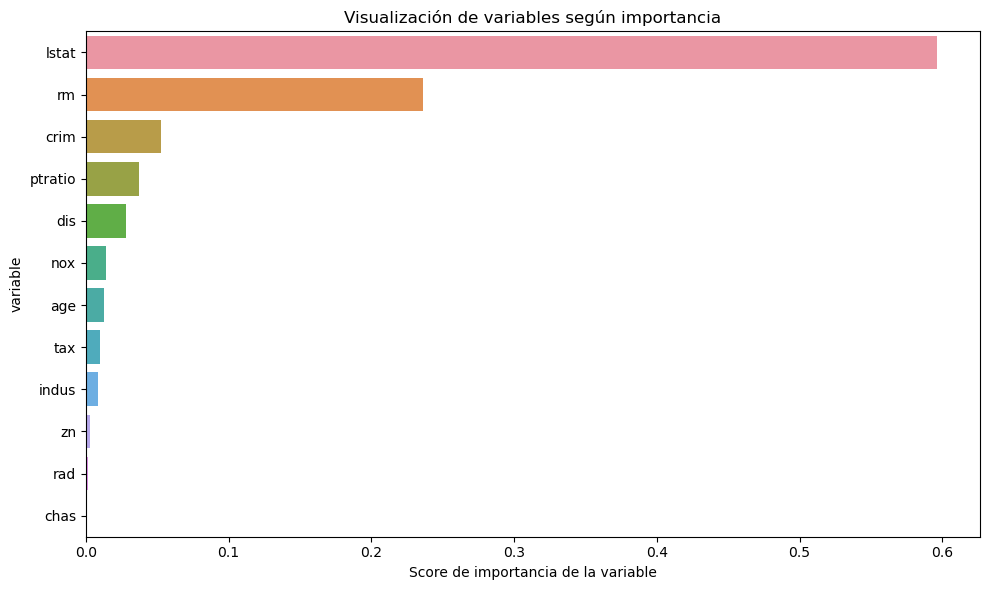

In [84]:
feature_imp = pd.Series(tree_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Score de importancia de la variable')
plt.ylabel('variable')
plt.title("Visualización de variables según importancia")
plt.tight_layout()

### Bagging (Bootstrap Aggregation)
Es un poderoso método de ensamble para evitar el sobreajuste. El concepto detrás del *bagging* es combinar las predicciones de varios modelos básicos para crear un resultado más preciso. *Bagging* es la aplicación del procedimiento Bootstrap a un algoritmo de aprendizaje automático de alta varianza, por ejemplo, los árboles de decisión. El rendimiento de los algoritmos de aprendizaje automático de alta varianza, como los árboles de decisión sin podar, se puede mejorar entrenando muchos árboles y tomando el promedio de sus predicciones. Los resultados suelen ser mejores que un solo árbol de decisiones.

Procedimiento:

0. Suponiendo que hay N observaciones y p características 
1. Se seleccionan B muestras de las observaciones al azar con reemplazo (Bootstrapping).
2. Se entrena el modelo en cada uno de los B datasets. 
3. Finalmente, la predicción se basa en la **agregación** de predicciones de todos los modelos (votación para los clasificadores o el promedio para las regresiones). Cada hipótesis tiene el mismo peso que todas las demás. 


Para utilizar Bagging con Scikit-Learn tenemos [BaggingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor) y [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier). En este caso usaremos BaggingRegressor dado que queremos predecir el valor de las viviendas (variable continua).

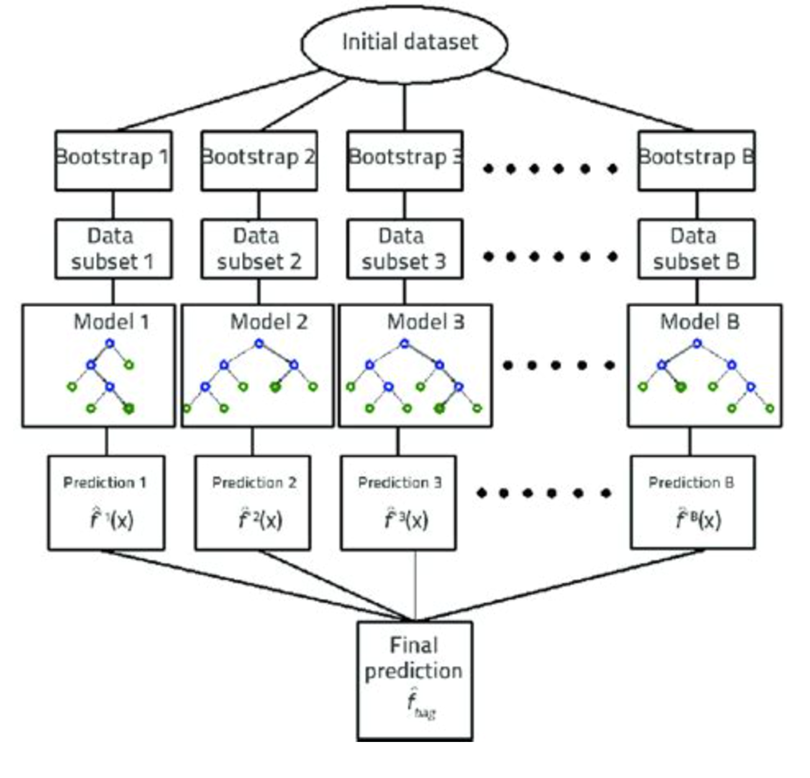

In [86]:
regressor = BaggingRegressor(n_estimators=25, max_samples=200, random_state=1) 
# estimator (Es None por default, y cuando eso ocurre el estimador es DecisionTreeRegressor.)
# n_estimators: cuántos modelos se corren
# max_samples: cuántas observaciones se consideran para cada modelo
# bootstrap: Si las muestras se obtienen con reemplazo (por default es True)
regressor.fit(X_train, Y_train) 
y_pred = regressor.predict(X_test)

In [88]:
ecm_bagg = metrics.mean_squared_error(Y_test, y_pred)
print('Error cuadrático medio:', ecm_bagg) 

Error cuadrático medio: 20.97551325490195


Recuerden que Bagging es simplemente un caso especial de Random Forest con m = p. Es decir, cuando se consideran todas las variables al elegir por cómo hacer las divisiones al entrenar cada árbol.

### Random Forest Regressor
El Random Forest, como Bagging, construye árboles de decisión con muestras obtenidas por bootstrapping y promedia los resultados de cada árbol para obtener la predicción final. 
Por qué "random"?
 - Muestreo aleatorio de datos de entrenamiento al construir árboles
 - Al dividir nodos, considera subconjuntos aleatorios de características para hacer la división (en lugar todos los predictores disponibles).
 
Así, los árboles obtenidos en el proceso estarán menos correlacionados y al promediarlos, la reducción en la varianza será mayor que la que se obtendría al promediar árboles más correlacionados.

Para utilizar Random Forest con Scikit-Learn tenemos [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=randomforestregressor#sklearn.ensemble.RandomForestRegressor) y [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier). En este caso usaremos RandomForestRegressor dado que queremos predecir el valor de las viviendas. 

In [90]:
regressor = RandomForestRegressor(n_estimators=25, max_samples=200, max_features=9, random_state=1) 
regressor.fit(X_train, Y_train) 
y_pred = regressor.predict(X_test)
ecm_rf = metrics.mean_squared_error(Y_test, y_pred)
print('Error cuadrático medio', ecm_rf)

Error cuadrático medio 21.739840627450974


Nota: podríamos elegir la configuración óptima por CV

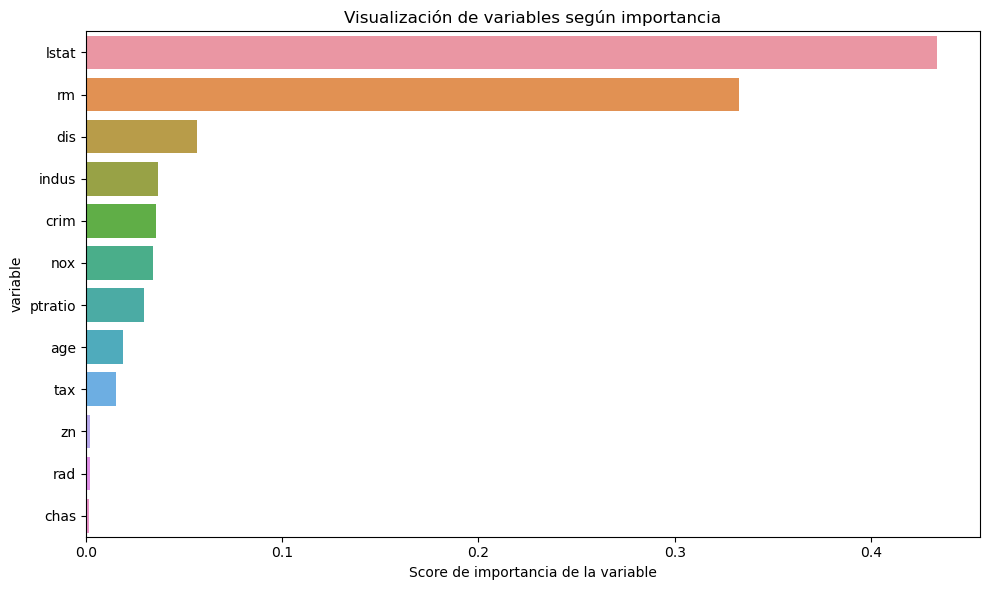

In [92]:
feature_imp = pd.Series(regressor.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Score de importancia de la variable')
plt.ylabel('variable')
plt.title("Visualización de variables según importancia")
plt.tight_layout()

#### Usando cross-validation para elegir los hiperparámetros
Una opción es usar [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [94]:
from sklearn.model_selection import GridSearchCV
params_grid_rf = {
    'bootstrap': [True],
    'max_samples': [0.25, 0.5, 0.75],
    'max_features': [3, 6, 9, "sqrt", None],
    'n_estimators': [25, 50, 75, 100]
}

cv = KFold(n_splits=5, random_state=100, shuffle=True)
rf = RandomForestRegressor(random_state=1)
grid_rf = GridSearchCV(estimator=rf, param_grid=params_grid_rf, cv=cv, verbose=2)
grid_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END bootstrap=True, max_features=3, max_samples=0.25, n_estimators=25; total time=   0.0s
[CV] END bootstrap=True, max_features=3, max_samples=0.25, n_estimators=25; total time=   0.0s
[CV] END bootstrap=True, max_features=3, max_samples=0.25, n_estimators=25; total time=   0.0s
[CV] END bootstrap=True, max_features=3, max_samples=0.25, n_estimators=25; total time=   0.0s
[CV] END bootstrap=True, max_features=3, max_samples=0.25, n_estimators=25; total time=   0.0s
[CV] END bootstrap=True, max_features=3, max_samples=0.25, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_features=3, max_samples=0.25, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_features=3, max_samples=0.25, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_features=3, max_samples=0.25, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_features=3, max_samples=0.25, n_estimators=50; total t

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RandomForestRegressor(random_state=1),
             param_grid={'bootstrap': [True],
                         'max_features': [3, 6, 9, 'sqrt', None],
                         'max_samples': [0.25, 0.5, 0.75],
                         'n_estimators': [25, 50, 75, 100]},
             verbose=2)

In [96]:
params_rf = grid_rf.best_params_
params_rf

{'bootstrap': True, 'max_features': 6, 'max_samples': 0.75, 'n_estimators': 25}

In [99]:
grid_rf.best_estimator_
# es equivalente a RandomForestRegressor(**params)

RandomForestRegressor(max_features=6, max_samples=0.75, n_estimators=25,
                      random_state=1)

In [101]:
y_pred = grid_rf.best_estimator_.predict(X_test)
print('Error cuadrático medio', metrics.mean_squared_error(Y_test, y_pred))

Error cuadrático medio 25.535199215686276


### AdaBoost
Un regresor AdaBoost es un metaestimador que comienza ajustando un regresor en el conjunto de datos original y luego ajusta copias adicionales del regresor en el mismo conjunto de datos, pero donde los pesos de las instancias se ajustan según el error de la predicción actual. Como tal, los regresores posteriores se enfocan más en casos difíciles.

Para utilizar AdaBoost Regressor con Scikit-Learn tenemos [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html?highlight=adaboost#sklearn.ensemble.AdaBoostRegressor) y [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html?highlight=adaboost#sklearn.ensemble.AdaBoostClassifier). En este caso usaremos AdaBoostRegressor dado que queremos predecir el valor de las viviendas


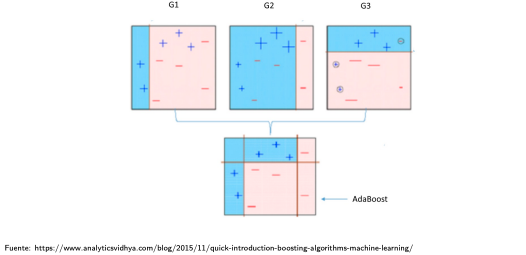

In [103]:
regressor = AdaBoostRegressor(n_estimators=25, random_state=1)
# estimator=None    DecisionTreeRegressor initialized with max_depth=3.
regressor.fit(X_train, Y_train) 
y_pred = regressor.predict(X_test)
ecm_adab = metrics.mean_squared_error(Y_test, y_pred)
print('Error cuadrático medio', ecm_adab)

Error cuadrático medio 27.33430136074425


In [105]:
print('ECM de:', 
      '\nCART:', ecm_cart,'\nBagging:', ecm_bagg, '\nRF:', ecm_rf, 
      '\nAdaBoost:', ecm_adab)

ECM de: 
CART: 33.50544944252839 
Bagging: 20.97551325490195 
RF: 21.739840627450974 
AdaBoost: 27.33430136074425
